In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras import layers
from keras import models
from keras.layers import Dense, Dropout, Flatten
from keras import optimizers
from keras.models import Sequential, Model
from keras.optimizers import RMSprop
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import Conv1D,MaxPooling1D
from keras.models import Sequential
from keras.layers import LSTM,GRU,Dense,Dropout,Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,mean_absolute_error

## Question 2

In [2]:
data = pd.read_csv("admData20.csv")
data.head


<bound method NDFrame.head of     ExpStartDate  AdmittedNum  AppliedNum  WeeksBeforeStart  Budget
0     10/29/2018            3          61                10      87
1     10/29/2018            7          84                 9      87
2     10/29/2018           10          90                 8      87
3     10/29/2018           24         118                 7      87
4     10/29/2018           39         132                 6      87
..           ...          ...         ...               ...     ...
142    6/15/2020            1          17                13     135
143    6/15/2020            5          26                12     135
144    6/15/2020            6          64                11     135
145    6/15/2020           13         122                10     135
146    6/15/2020           17         154                 9     135

[147 rows x 5 columns]>

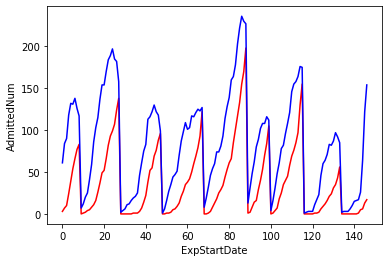

In [3]:
plt.plot(range(data.shape[0]),data['AdmittedNum'],color = 'r')
plt.plot(range(data.shape[0]),data['AppliedNum'],color = 'b')
plt.xlabel('ExpStartDate')
plt.ylabel('AdmittedNum')
plt.show()


In [4]:
num = data[["AdmittedNum"]].values

In [17]:
trainP = round(num.shape[0]*0.7)
valP = round(num.shape[0]*0.15)
train = num[:trainP]
val = num[trainP:trainP+valP]
test =num[trainP+valP:]

## Training, validation and test set plot

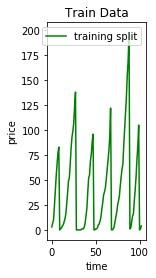

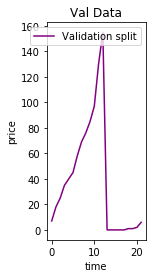

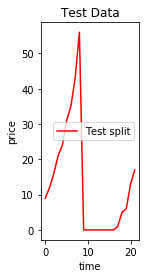

In [18]:
import matplotlib.pyplot as plt
plt.subplot(1,3,1)
plt.plot(range(train.shape[0]),train, color = 'green',label ="training split")
plt.title("Train Data")
plt.xlabel("time")
plt.ylabel("price")
plt.legend()
plt.show()
plt.subplot(1,3,2)
plt.plot(range(val.shape[0]),val, color = 'purple',label ="Validation split")
plt.title("Val Data")
plt.xlabel("time")
plt.ylabel("price")
plt.legend()
plt.show()
plt.subplot(1,3,3)
plt.plot(range(test.shape[0]),test, color = 'red',label ="Test split")
plt.title("Test Data")
plt.xlabel("time")
plt.ylabel("price")
plt.legend()
plt.show()

## Normalization of data

In [19]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
train = train.reshape(-1,1)
val = val.reshape(-1,1)

test = test.reshape(-1,1)
sc.fit(train)
train_norm = sc.transform(train)
val_norm = sc.transform(val)
test_norm = sc.transform(test)


## Function

In [20]:
def createSeq(dataset, lookback, foresight):
    X, Y = [], []
    for i in range(len(dataset)-lookback-foresight):
        obs = dataset[i:(i+lookback), 0]
        X.append(obs)
        Y.append(dataset[i+(lookback+foresight), 0])
    return np.array(X), np.array(Y)


In [21]:
def gru(lookback):
    model = Sequential()

    model.add(layers.GRU(32, input_shape=(lookback, 1), dropout=0.1, recurrent_dropout=0.1))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))

    model.compile(loss='mae', optimizer='adam')
    
    return model


In [22]:
def lstm(lookback):
    model = Sequential()

    model.add(layers.LSTM(32, input_shape=(lookback, 1), dropout=0.1, recurrent_dropout=0.1))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))

    model.compile(loss='mae', optimizer='adam')
    
    return model



## for Week 1

In [23]:
train_norm_x0 ,train_norm_y0 = createSeq(train_norm, lookback = 2, foresight = 0)
val_norm_x0 ,val_norm_y0 = createSeq(val_norm, lookback = 2, foresight = 0)
test_norm_x0 ,test_norm_y0 = createSeq(test_norm, lookback = 2, foresight = 0)

In [24]:
trnx0 = np.reshape(train_norm_x0,(train_norm_x0.shape[0],train_norm_x0.shape[1],1))
vanx0 = np.reshape(val_norm_x0,(val_norm_x0.shape[0],val_norm_x0.shape[1],1))
tenx0 = np.reshape(test_norm_x0,(test_norm_x0.shape[0],test_norm_x0.shape[1],1))

In [25]:
model_gru0 = gru(2)
network_name = 'gru'
filepath = network_name + "_epcoh_{epoch:02d}-loss-{loss:.4f}-.hdf5"
checkpoint = ModelCheckpoint (filepath, monitor = "loss",verbose = 0,save_best_only = True,mode = 'min')
callbacks_list = [checkpoint]
network_gru0 = model_gru0.fit(trnx0,train_norm_y0,validation_data = (vanx0, val_norm_y0),epochs = 100,batch_size = 64,callbacks = callbacks_list)


Train on 101 samples, validate on 20 samples
Epoch 1/100
101/101 [==============================] - 1s 5ms/step - loss: 0.2281 - val_loss: 0.2151
Epoch 2/100
101/101 [==============================] - 0s 75us/step - loss: 0.2140 - val_loss: 0.2062
Epoch 3/100
101/101 [==============================] - 0s 70us/step - loss: 0.2033 - val_loss: 0.2015
Epoch 4/100
101/101 [==============================] - 0s 73us/step - loss: 0.1963 - val_loss: 0.1979
Epoch 5/100
101/101 [==============================] - 0s 67us/step - loss: 0.1918 - val_loss: 0.1950
Epoch 6/100
101/101 [==============================] - 0s 77us/step - loss: 0.1873 - val_loss: 0.1923
Epoch 7/100
101/101 [==============================] - 0s 73us/step - loss: 0.1829 - val_loss: 0.1892
Epoch 8/100
101/101 [==============================] - 0s 67us/step - loss: 0.1781 - val_loss: 0.1855
Epoch 9/100
101/101 [==============================] - 0s 85us/step - loss: 0.1753 - val_loss: 0.1816
Epoch 10/100
101/101 [================

In [26]:
model_lstm0 = lstm(2)
network_name = 'lstm'
filepath = network_name + "_epcoh_{epoch:02d}-loss-{loss:.4f}-.hdf5"
checkpoint = ModelCheckpoint (filepath, monitor = "loss",verbose = 0,save_best_only = True,mode = 'min')
callbacks_list = [checkpoint]
network_lstm0 = model_lstm0.fit(trnx0,train_norm_y0,validation_data = (vanx0, val_norm_y0),epochs = 100,batch_size = 64,callbacks = callbacks_list)

Train on 101 samples, validate on 20 samples
Epoch 1/100
101/101 [==============================] - 0s 5ms/step - loss: 0.2236 - val_loss: 0.2136
Epoch 2/100
101/101 [==============================] - 0s 57us/step - loss: 0.2123 - val_loss: 0.2058
Epoch 3/100
101/101 [==============================] - 0s 61us/step - loss: 0.2027 - val_loss: 0.2012
Epoch 4/100
101/101 [==============================] - 0s 64us/step - loss: 0.1966 - val_loss: 0.1979
Epoch 5/100
101/101 [==============================] - 0s 61us/step - loss: 0.1914 - val_loss: 0.1955
Epoch 6/100
101/101 [==============================] - 0s 79us/step - loss: 0.1871 - val_loss: 0.1933
Epoch 7/100
101/101 [==============================] - 0s 69us/step - loss: 0.1837 - val_loss: 0.1910
Epoch 8/100
101/101 [==============================] - 0s 71us/step - loss: 0.1799 - val_loss: 0.1886
Epoch 9/100
101/101 [==============================] - 0s 67us/step - loss: 0.1784 - val_loss: 0.1864
Epoch 10/100
101/101 [================

In [27]:
preds0=model_gru0.predict(tenx0)
mae1_g=mean_absolute_error(test_norm_y0,preds0)
print('GRU_Mean_Absolute_Error:',mae1_g)

GRU_Mean_Absolute_Error: 0.027737162713281287


In [28]:
preds0=model_lstm0.predict(tenx0)
mae1_l=mean_absolute_error(test_norm_y0,preds0)
print('GRU_Mean_Absolute_Error:',mae1_l)

GRU_Mean_Absolute_Error: 0.034753134240857284


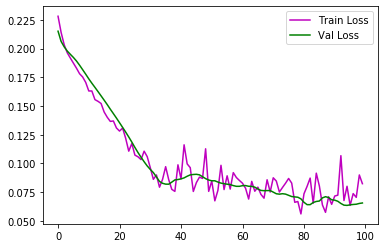

In [29]:
plt.plot(network_gru0.history['loss'],label='Train Loss',color = 'm')
plt.plot(network_gru0.history['val_loss'],label='Val Loss',color = 'g')
plt.legend()
plt.show()

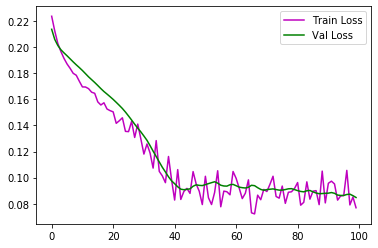

In [30]:
plt.plot(network_lstm0.history['loss'],label='Train Loss',color = 'm')
plt.plot(network_lstm0.history['val_loss'],label='Val Loss',color = 'g')
plt.legend()
plt.show()

## For Week 2

In [31]:
train_norm_x1 ,train_norm_y1 = createSeq(train_norm, lookback = 2, foresight = 1)
val_norm_x1 ,val_norm_y1 = createSeq(val_norm, lookback = 2, foresight = 1)
test_norm_x1 ,test_norm_y1 = createSeq(test_norm, lookback = 2, foresight = 1)
trnx1 = np.reshape(train_norm_x1,(train_norm_x1.shape[0],train_norm_x1.shape[1],1))
vanx1 = np.reshape(val_norm_x1,(val_norm_x1.shape[0],val_norm_x1.shape[1],1))
tenx1 = np.reshape(test_norm_x1,(test_norm_x1.shape[0],test_norm_x1.shape[1],1))
model_gru1 = gru(2)
network_name = 'gru'
filepath = network_name + "_epcoh_{epoch:02d}-loss-{loss:.4f}-.hdf5"
checkpoint = ModelCheckpoint (filepath, monitor = "loss",verbose = 0,save_best_only = True,mode = 'min')
callbacks_list = [checkpoint]
network_gru1 = model_gru1.fit(trnx1,train_norm_y1,validation_data = (vanx1, val_norm_y1),epochs = 100,batch_size = 64,callbacks = callbacks_list)


Train on 100 samples, validate on 19 samples
Epoch 1/100
100/100 [==============================] - 1s 5ms/step - loss: 0.2035 - val_loss: 0.2011
Epoch 2/100
100/100 [==============================] - 0s 67us/step - loss: 0.1948 - val_loss: 0.1978
Epoch 3/100
100/100 [==============================] - 0s 66us/step - loss: 0.1874 - val_loss: 0.1948
Epoch 4/100
100/100 [==============================] - 0s 77us/step - loss: 0.1821 - val_loss: 0.1927
Epoch 5/100
100/100 [==============================] - 0s 72us/step - loss: 0.1812 - val_loss: 0.1905
Epoch 6/100
100/100 [==============================] - 0s 84us/step - loss: 0.1752 - val_loss: 0.1883
Epoch 7/100
100/100 [==============================] - 0s 87us/step - loss: 0.1694 - val_loss: 0.1860
Epoch 8/100
100/100 [==============================] - 0s 83us/step - loss: 0.1645 - val_loss: 0.1835
Epoch 9/100
100/100 [==============================] - 0s 77us/step - loss: 0.1668 - val_loss: 0.1812
Epoch 10/100
100/100 [================

In [32]:
model_lstm1 = lstm(2)
network_name = 'lstm'
filepath = network_name + "_epcoh_{epoch:02d}-loss-{loss:.4f}-.hdf5"
checkpoint = ModelCheckpoint (filepath, monitor = "loss",verbose = 0,save_best_only = True,mode = 'min')
callbacks_list = [checkpoint]
network_lstm1 = model_lstm1.fit(trnx1,train_norm_y1,validation_data = (vanx1, val_norm_y1),epochs = 100,batch_size = 64,callbacks = callbacks_list)

Train on 100 samples, validate on 19 samples
Epoch 1/100
100/100 [==============================] - 0s 5ms/step - loss: 0.2068 - val_loss: 0.2056
Epoch 2/100
100/100 [==============================] - 0s 59us/step - loss: 0.2008 - val_loss: 0.2031
Epoch 3/100
100/100 [==============================] - 0s 58us/step - loss: 0.1950 - val_loss: 0.2006
Epoch 4/100
100/100 [==============================] - 0s 66us/step - loss: 0.1912 - val_loss: 0.1993
Epoch 5/100
100/100 [==============================] - 0s 65us/step - loss: 0.1866 - val_loss: 0.1979
Epoch 6/100
100/100 [==============================] - 0s 65us/step - loss: 0.1818 - val_loss: 0.1964
Epoch 7/100
100/100 [==============================] - 0s 64us/step - loss: 0.1786 - val_loss: 0.1950
Epoch 8/100
100/100 [==============================] - 0s 73us/step - loss: 0.1736 - val_loss: 0.1935
Epoch 9/100
100/100 [==============================] - 0s 59us/step - loss: 0.1707 - val_loss: 0.1918
Epoch 10/100
100/100 [================

In [33]:
preds1=model_gru1.predict(tenx1)
mae2_g=mean_absolute_error(test_norm_y1,preds1)
print('GRU_Mean_Absolute_Error:',mae2_g)

GRU_Mean_Absolute_Error: 0.050825010965331194


In [34]:
preds1=model_lstm1.predict(tenx1)
mae2_l=mean_absolute_error(test_norm_y1,preds1)
print('GRU_Mean_Absolute_Error:',mae2_l)

GRU_Mean_Absolute_Error: 0.057941213931446696


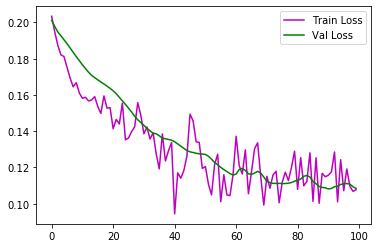

In [35]:
plt.plot(network_gru1.history['loss'],label='Train Loss',color = 'm')
plt.plot(network_gru1.history['val_loss'],label='Val Loss',color = 'g')
plt.legend()
plt.show()

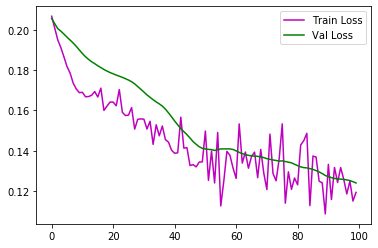

In [36]:
plt.plot(network_lstm1.history['loss'],label='Train Loss',color = 'm')
plt.plot(network_lstm1.history['val_loss'],label='Val Loss',color = 'g')
plt.legend()
plt.show()

## For week 3

In [37]:
train_norm_x2 ,train_norm_y2 = createSeq(train_norm, lookback = 2, foresight = 2)
val_norm_x2 ,val_norm_y2 = createSeq(val_norm, lookback = 2, foresight = 2)
test_norm_x2 ,test_norm_y2 = createSeq(test_norm, lookback = 2, foresight = 2)
trnx2 = np.reshape(train_norm_x2,(train_norm_x2.shape[0],train_norm_x2.shape[1],1))
vanx2 = np.reshape(val_norm_x2,(val_norm_x2.shape[0],val_norm_x2.shape[1],1))
tenx2 = np.reshape(test_norm_x2,(test_norm_x2.shape[0],test_norm_x2.shape[1],1))
model_gru2 = gru(2)
network_name = 'gru'
filepath = network_name + "_epcoh_{epoch:02d}-loss-{loss:.4f}-.hdf5"
checkpoint = ModelCheckpoint (filepath, monitor = "loss",verbose = 0,save_best_only = True,mode = 'min')
callbacks_list = [checkpoint]
network_gru2 = model_gru2.fit(trnx2,train_norm_y2,validation_data = (vanx2, val_norm_y2),epochs = 100,batch_size = 64,callbacks = callbacks_list)


Train on 99 samples, validate on 18 samples
Epoch 1/100
99/99 [==============================] - 1s 5ms/step - loss: 0.2083 - val_loss: 0.2102
Epoch 2/100
99/99 [==============================] - 0s 73us/step - loss: 0.2013 - val_loss: 0.2079
Epoch 3/100
99/99 [==============================] - 0s 70us/step - loss: 0.1939 - val_loss: 0.2076
Epoch 4/100
99/99 [==============================] - 0s 70us/step - loss: 0.1901 - val_loss: 0.2074
Epoch 5/100
99/99 [==============================] - 0s 75us/step - loss: 0.1842 - val_loss: 0.2072
Epoch 6/100
99/99 [==============================] - 0s 72us/step - loss: 0.1825 - val_loss: 0.2068
Epoch 7/100
99/99 [==============================] - 0s 78us/step - loss: 0.1830 - val_loss: 0.2064
Epoch 8/100
99/99 [==============================] - 0s 81us/step - loss: 0.1779 - val_loss: 0.2057
Epoch 9/100
99/99 [==============================] - 0s 73us/step - loss: 0.1751 - val_loss: 0.2050
Epoch 10/100
99/99 [==============================] - 0s 

In [38]:
model_lstm2 = lstm(2)
network_name = 'lstm'
filepath = network_name + "_epcoh_{epoch:02d}-loss-{loss:.4f}-.hdf5"
checkpoint = ModelCheckpoint (filepath, monitor = "loss",verbose = 0,save_best_only = True,mode = 'min')
callbacks_list = [checkpoint]
network_lstm2 = model_lstm2.fit(trnx2,train_norm_y2,validation_data = (vanx2, val_norm_y2),epochs = 100,batch_size = 64,callbacks = callbacks_list)

Train on 99 samples, validate on 18 samples
Epoch 1/100
99/99 [==============================] - 0s 5ms/step - loss: 0.2130 - val_loss: 0.2106
Epoch 2/100
99/99 [==============================] - 0s 59us/step - loss: 0.2050 - val_loss: 0.2089
Epoch 3/100
99/99 [==============================] - 0s 63us/step - loss: 0.2002 - val_loss: 0.2078
Epoch 4/100
99/99 [==============================] - 0s 62us/step - loss: 0.1971 - val_loss: 0.2072
Epoch 5/100
99/99 [==============================] - 0s 65us/step - loss: 0.1925 - val_loss: 0.2071
Epoch 6/100
99/99 [==============================] - 0s 72us/step - loss: 0.1899 - val_loss: 0.2070
Epoch 7/100
99/99 [==============================] - 0s 66us/step - loss: 0.1878 - val_loss: 0.2069
Epoch 8/100
99/99 [==============================] - 0s 67us/step - loss: 0.1875 - val_loss: 0.2067
Epoch 9/100
99/99 [==============================] - 0s 115us/step - loss: 0.1846 - val_loss: 0.2065
Epoch 10/100
99/99 [==============================] - 0s

In [39]:
preds2=model_gru2.predict(tenx2)
mae3_g=mean_absolute_error(test_norm_y2,preds2)
print('GRU_Mean_Absolute_Error:',mae3_g)

GRU_Mean_Absolute_Error: 0.09149944336769222


In [40]:
preds2=model_lstm2.predict(tenx2)
mae3_l=mean_absolute_error(test_norm_y2,preds2)
print('GRU_Mean_Absolute_Error:',mae3_l)

GRU_Mean_Absolute_Error: 0.11686560456399563


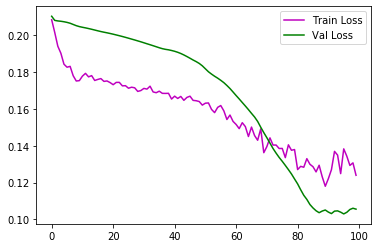

In [41]:
plt.plot(network_gru2.history['loss'],label='Train Loss',color = 'm')
plt.plot(network_gru2.history['val_loss'],label='Val Loss',color = 'g')
plt.legend()
plt.show()

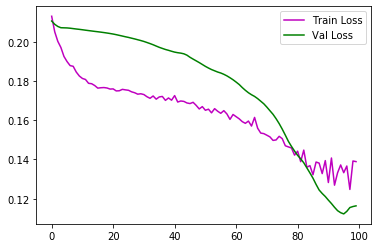

In [42]:
plt.plot(network_lstm2.history['loss'],label='Train Loss',color = 'm')
plt.plot(network_lstm2.history['val_loss'],label='Val Loss',color = 'g')
plt.legend()
plt.show()

## For week = 4

In [43]:
train_norm_x3 ,train_norm_y3 = createSeq(train_norm, lookback = 2, foresight = 3)
val_norm_x3 ,val_norm_y3 = createSeq(val_norm, lookback = 2, foresight = 3)
test_norm_x3 ,test_norm_y3 = createSeq(test_norm, lookback = 2, foresight = 3)
trnx3 = np.reshape(train_norm_x3,(train_norm_x3.shape[0],train_norm_x3.shape[1],1))
vanx3 = np.reshape(val_norm_x3,(val_norm_x3.shape[0],val_norm_x3.shape[1],1))
tenx3 = np.reshape(test_norm_x3,(test_norm_x3.shape[0],test_norm_x3.shape[1],1))
model_gru3 = gru(2)
network_name = 'gru'
filepath = network_name + "_epcoh_{epoch:02d}-loss-{loss:.4f}-.hdf5"
checkpoint = ModelCheckpoint (filepath, monitor = "loss",verbose = 0,save_best_only = True,mode = 'min')
callbacks_list = [checkpoint]
network_gru3 = model_gru3.fit(trnx3,train_norm_y3,validation_data = (vanx3, val_norm_y3),epochs = 100,batch_size = 64,callbacks = callbacks_list)


Train on 98 samples, validate on 17 samples
Epoch 1/100
98/98 [==============================] - 1s 6ms/step - loss: 0.2122 - val_loss: 0.2132
Epoch 2/100
98/98 [==============================] - 0s 65us/step - loss: 0.2036 - val_loss: 0.2126
Epoch 3/100
98/98 [==============================] - 0s 66us/step - loss: 0.1981 - val_loss: 0.2127
Epoch 4/100
98/98 [==============================] - 0s 65us/step - loss: 0.1916 - val_loss: 0.2129
Epoch 5/100
98/98 [==============================] - 0s 71us/step - loss: 0.1881 - val_loss: 0.2123
Epoch 6/100
98/98 [==============================] - 0s 65us/step - loss: 0.1842 - val_loss: 0.2114
Epoch 7/100
98/98 [==============================] - 0s 70us/step - loss: 0.1796 - val_loss: 0.2097
Epoch 8/100
98/98 [==============================] - 0s 74us/step - loss: 0.1778 - val_loss: 0.2078
Epoch 9/100
98/98 [==============================] - 0s 81us/step - loss: 0.1743 - val_loss: 0.2062
Epoch 10/100
98/98 [==============================] - 0s 

In [44]:
model_lstm3 = lstm(2)
network_name = 'lstm'
filepath = network_name + "_epcoh_{epoch:02d}-loss-{loss:.4f}-.hdf5"
checkpoint = ModelCheckpoint (filepath, monitor = "loss",verbose = 0,save_best_only = True,mode = 'min')
callbacks_list = [checkpoint]
network_lstm3 = model_lstm3.fit(trnx3,train_norm_y3,validation_data = (vanx3, val_norm_y3),epochs = 100,batch_size = 64,callbacks = callbacks_list)

Train on 98 samples, validate on 17 samples
Epoch 1/100
98/98 [==============================] - 0s 5ms/step - loss: 0.2110 - val_loss: 0.2136
Epoch 2/100
98/98 [==============================] - 0s 64us/step - loss: 0.2043 - val_loss: 0.2135
Epoch 3/100
98/98 [==============================] - 0s 59us/step - loss: 0.1995 - val_loss: 0.2134
Epoch 4/100
98/98 [==============================] - 0s 56us/step - loss: 0.1953 - val_loss: 0.2142
Epoch 5/100
98/98 [==============================] - 0s 63us/step - loss: 0.1928 - val_loss: 0.2148
Epoch 6/100
98/98 [==============================] - 0s 74us/step - loss: 0.1900 - val_loss: 0.2151
Epoch 7/100
98/98 [==============================] - 0s 68us/step - loss: 0.1881 - val_loss: 0.2152
Epoch 8/100
98/98 [==============================] - 0s 72us/step - loss: 0.1857 - val_loss: 0.2151
Epoch 9/100
98/98 [==============================] - 0s 68us/step - loss: 0.1843 - val_loss: 0.2147
Epoch 10/100
98/98 [==============================] - 0s 

In [45]:
preds3=model_gru3.predict(tenx3)
mae4_g=mean_absolute_error(test_norm_y3,preds3)
print('GRU_Mean_Absolute_Error:',mae4_g)

GRU_Mean_Absolute_Error: 0.13177532607504674


In [46]:
preds3=model_lstm3.predict(tenx3)
mae4_l=mean_absolute_error(test_norm_y3,preds3)
print('GRU_Mean_Absolute_Error:',mae4_l)

GRU_Mean_Absolute_Error: 0.14080075971423622


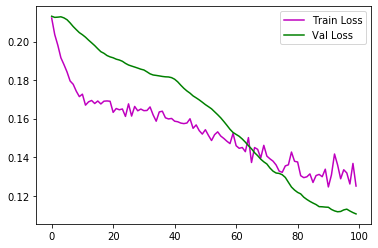

In [47]:
plt.plot(network_gru3.history['loss'],label='Train Loss',color = 'm')
plt.plot(network_gru3.history['val_loss'],label='Val Loss',color = 'g')
plt.legend()
plt.show()

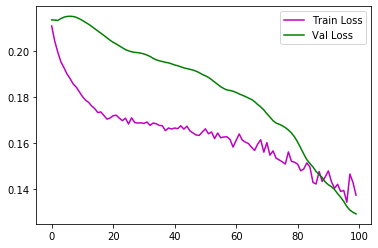

In [48]:
plt.plot(network_lstm3.history['loss'],label='Train Loss',color = 'm')
plt.plot(network_lstm3.history['val_loss'],label='Val Loss',color = 'g')
plt.legend()
plt.show()

## For week 4

In [49]:
train_norm_x4 ,train_norm_y4 = createSeq(train_norm, lookback = 2, foresight = 4)
val_norm_x4 ,val_norm_y4 = createSeq(val_norm, lookback = 2, foresight = 4)
test_norm_x4 ,test_norm_y4 = createSeq(test_norm, lookback = 2, foresight = 4)
trnx4 = np.reshape(train_norm_x4,(train_norm_x4.shape[0],train_norm_x4.shape[1],1))
vanx4 = np.reshape(val_norm_x4,(val_norm_x4.shape[0],val_norm_x4.shape[1],1))
tenx4 = np.reshape(test_norm_x4,(test_norm_x4.shape[0],test_norm_x4.shape[1],1))
model_gru4 = gru(2)
network_name = 'gru'
filepath = network_name + "_epcoh_{epoch:02d}-loss-{loss:.4f}-.hdf5"
checkpoint = ModelCheckpoint (filepath, monitor = "loss",verbose = 0,save_best_only = True,mode = 'min')
callbacks_list = [checkpoint]
network_gru4 = model_gru4.fit(trnx4,train_norm_y4,validation_data = (vanx4, val_norm_y4),epochs = 100,batch_size = 64,callbacks = callbacks_list)


Train on 97 samples, validate on 16 samples
Epoch 1/100
97/97 [==============================] - 1s 5ms/step - loss: 0.2298 - val_loss: 0.2183
Epoch 2/100
97/97 [==============================] - 0s 76us/step - loss: 0.2097 - val_loss: 0.2092
Epoch 3/100
97/97 [==============================] - 0s 73us/step - loss: 0.1989 - val_loss: 0.2135
Epoch 4/100
97/97 [==============================] - 0s 75us/step - loss: 0.1940 - val_loss: 0.2173
Epoch 5/100
97/97 [==============================] - 0s 74us/step - loss: 0.1909 - val_loss: 0.2194
Epoch 6/100
97/97 [==============================] - 0s 65us/step - loss: 0.1888 - val_loss: 0.2205
Epoch 7/100
97/97 [==============================] - 0s 69us/step - loss: 0.1866 - val_loss: 0.2212
Epoch 8/100
97/97 [==============================] - 0s 80us/step - loss: 0.1849 - val_loss: 0.2211
Epoch 9/100
97/97 [==============================] - 0s 85us/step - loss: 0.1821 - val_loss: 0.2203
Epoch 10/100
97/97 [==============================] - 0s 

In [50]:
model_lstm4 = lstm(2)
network_name = 'lstm'
filepath = network_name + "_epcoh_{epoch:02d}-loss-{loss:.4f}-.hdf5"
checkpoint = ModelCheckpoint (filepath, monitor = "loss",verbose = 0,save_best_only = True,mode = 'min')
callbacks_list = [checkpoint]
network_lstm4 = model_lstm4.fit(trnx4,train_norm_y4,validation_data = (vanx4, val_norm_y4),epochs = 100,batch_size = 64,callbacks = callbacks_list)

Train on 97 samples, validate on 16 samples
Epoch 1/100
97/97 [==============================] - 1s 6ms/step - loss: 0.2143 - val_loss: 0.2121
Epoch 2/100
97/97 [==============================] - 0s 67us/step - loss: 0.2070 - val_loss: 0.2126
Epoch 3/100
97/97 [==============================] - 0s 60us/step - loss: 0.2020 - val_loss: 0.2137
Epoch 4/100
97/97 [==============================] - 0s 79us/step - loss: 0.1990 - val_loss: 0.2146
Epoch 5/100
97/97 [==============================] - 0s 72us/step - loss: 0.1958 - val_loss: 0.2161
Epoch 6/100
97/97 [==============================] - 0s 68us/step - loss: 0.1937 - val_loss: 0.2172
Epoch 7/100
97/97 [==============================] - 0s 66us/step - loss: 0.1924 - val_loss: 0.2179
Epoch 8/100
97/97 [==============================] - 0s 63us/step - loss: 0.1906 - val_loss: 0.2183
Epoch 9/100
97/97 [==============================] - 0s 65us/step - loss: 0.1885 - val_loss: 0.2182
Epoch 10/100
97/97 [==============================] - 0s 

In [51]:
preds4=model_gru4.predict(tenx4)
mae5_g=mean_absolute_error(test_norm_y4,preds4)
print('GRU_Mean_Absolute_Error:',mae5_g)

GRU_Mean_Absolute_Error: 0.15390955096091885


In [52]:
preds4=model_lstm4.predict(tenx4)
mae5_l=mean_absolute_error(test_norm_y4,preds4)
print('GRU_Mean_Absolute_Error:',mae5_l)

GRU_Mean_Absolute_Error: 0.1483457265233602


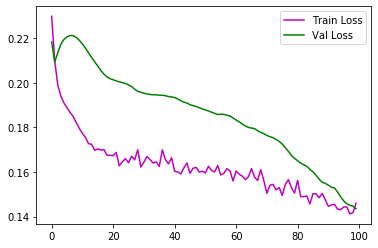

In [53]:
plt.plot(network_gru4.history['loss'],label='Train Loss',color = 'm')
plt.plot(network_gru4.history['val_loss'],label='Val Loss',color = 'g')
plt.legend()
plt.show()

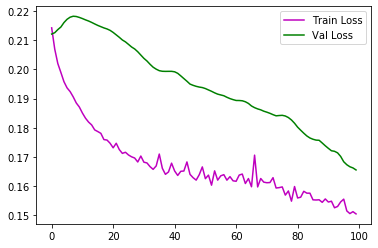

In [54]:
plt.plot(network_lstm4.history['loss'],label='Train Loss',color = 'm')
plt.plot(network_lstm4.history['val_loss'],label='Val Loss',color = 'g')
plt.legend()
plt.show()

# Part b

## 1D Convnet

In [55]:

def oned_convnet(lookback):
    model = Sequential()

    model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(lookback, 1), padding='same'))
    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    model.compile(optimizer='adam', loss='mae')
    
    return model

## 1D- GRU 

In [56]:
from keras.layers import LSTM,GRU,Dense,Dropout,Flatten,RepeatVector,Conv2D,MaxPooling2D
def dlstm(lookback):
    model_1dl = Sequential()
    model_1dl.add(Conv1D(64,kernel_size=1, activation='relu',input_shape=(lookback,1)))
    model_1dl.add(MaxPooling1D(pool_size=1))
    model_1dl.add(Flatten())
    model_1dl.add(RepeatVector(3))
    model_1dl.add(LSTM(64,activation='relu'))
    model_1dl.add(Dense(1))
    model_1dl.compile(loss='mae',optimizer='adam',metrics=['mean_absolute_error'])
    return model_1dl


In [57]:
def dgru(lookback):
    model_1dg = Sequential()
    model_1dg.add(Conv1D(64,kernel_size=1, activation='relu',input_shape=(lookback,1)))
    model_1dg.add(MaxPooling1D(pool_size=1))
    model_1dg.add(Flatten())
    model_1dg.add(RepeatVector(3))
    model_1dg.add(GRU(64,activation='relu'))
    model_1dg.add(Dense(1))
    model_1dg.compile(loss='mae',optimizer='adam',metrics=['mean_absolute_error'])
    return model_1dg



## For week 1

In [58]:
model_1dg0 = dgru(2)
network_1dg0=model_1dg0.fit(trnx0,train_norm_y0,validation_data=(vanx0,val_norm_y0),epochs=100,batch_size=32,verbose=0)
model_1dl0 = dlstm(2)
network_1dl0=model_1dl0.fit(trnx0,train_norm_y0,validation_data=(vanx0,val_norm_y0),epochs=100,batch_size=32,verbose=0)
pred_1dg0=model_1dg0.predict(tenx0)
mae1_1dg=mean_absolute_error(test_norm_y0,pred_1dg0)
print('Conv1D-GRI_Mean_Absolute_Error:',mae1_1dg)
pred_1dl0=model_1dl0.predict(tenx0)
mae1_1dl=mean_absolute_error(test_norm_y0,pred_1dl0)
print('Conv1D-LSTM_Mean_Absolute_Error:',mae1_1dl)

Conv1D-GRI_Mean_Absolute_Error: 0.028486656089962436
Conv1D-LSTM_Mean_Absolute_Error: 0.027603240166978932


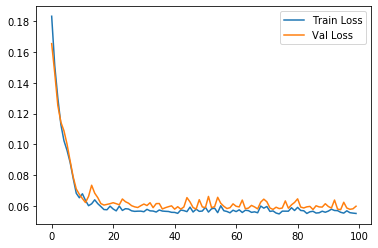

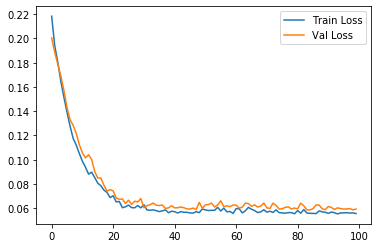

In [59]:
plt.plot(network_1dg0.history['loss'],label='Train Loss')
plt.plot(network_1dg0.history['val_loss'],label='Val Loss')
plt.legend()
plt.show()
plt.plot(network_1dl0.history['loss'],label='Train Loss')
plt.plot(network_1dl0.history['val_loss'],label='Val Loss')
plt.legend()
plt.show()

## For Week 2

In [60]:
model_1dg1 = dgru(2)
network_1dg1=model_1dg1.fit(trnx1,train_norm_y1,validation_data=(vanx1,val_norm_y1),epochs=100,batch_size=32,verbose=0)
model_1dl1 = dlstm(2)
network_1dl1=model_1dl1.fit(trnx1,train_norm_y1,validation_data=(vanx1,val_norm_y1),epochs=100,batch_size=32,verbose=0)
pred_1dg1=model_1dg1.predict(tenx1)
mae2_1dg=mean_absolute_error(test_norm_y1,pred_1dg1)
print('Conv1D-GRI_Mean_Absolute_Error:',mae2_1dg)
pred_1dl1=model_1dl1.predict(tenx1)
mae2_1dl=mean_absolute_error(test_norm_y1,pred_1dl1)
print('Conv1D-LSTM_Mean_Absolute_Error:',mae2_1dl)

Conv1D-GRI_Mean_Absolute_Error: 0.059546520744372645
Conv1D-LSTM_Mean_Absolute_Error: 0.05868066500046512


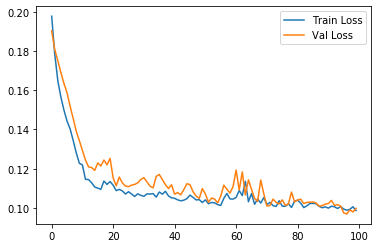

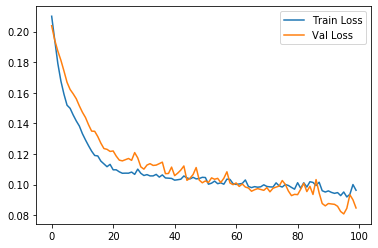

In [61]:
plt.plot(network_1dg1.history['loss'],label='Train Loss')
plt.plot(network_1dg1.history['val_loss'],label='Val Loss')
plt.legend()
plt.show()
plt.plot(network_1dl1.history['loss'],label='Train Loss')
plt.plot(network_1dl1.history['val_loss'],label='Val Loss')
plt.legend()
plt.show()

## For Week 3

In [62]:
model_1dg2 = dgru(2)
network_1dg2=model_1dg2.fit(trnx2,train_norm_y2,validation_data=(vanx2,val_norm_y2),epochs=100,batch_size=32,verbose=0)
model_1dl2 = dlstm(2)
network_1dl2=model_1dl2.fit(trnx2,train_norm_y2,validation_data=(vanx2,val_norm_y2),epochs=100,batch_size=32,verbose=0)
pred_1dg2=model_1dg2.predict(tenx2)
mae3_1dg=mean_absolute_error(test_norm_y2,pred_1dg2)
print('Conv1D-GRI_Mean_Absolute_Error:',mae3_1dg)
pred_1dl2=model_1dl2.predict(tenx2)
mae3_1dl=mean_absolute_error(test_norm_y2,pred_1dl2)
print('Conv1D-LSTM_Mean_Absolute_Error:',mae3_1dl)

Conv1D-GRI_Mean_Absolute_Error: 0.07754084921319677
Conv1D-LSTM_Mean_Absolute_Error: 0.09306908081945213


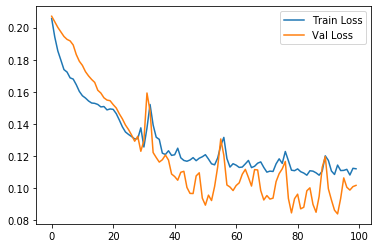

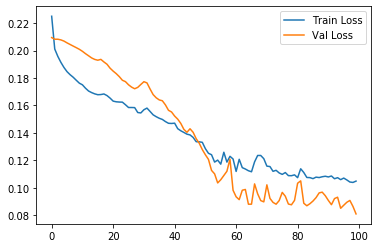

In [63]:
plt.plot(network_1dg2.history['loss'],label='Train Loss')
plt.plot(network_1dg2.history['val_loss'],label='Val Loss')
plt.legend()
plt.show()
plt.plot(network_1dl2.history['loss'],label='Train Loss')
plt.plot(network_1dl2.history['val_loss'],label='Val Loss')
plt.legend()
plt.show()

## For Week 4

In [68]:
model_1dg3 = dgru(2)
network_1dg3=model_1dg3.fit(trnx3,train_norm_y3,validation_data=(vanx3,val_norm_y3),epochs=100,batch_size=32,verbose=0)
model_1dl3 = dlstm(2)
network_1dl3=model_1dl3.fit(trnx3,train_norm_y3,validation_data=(vanx3,val_norm_y3),epochs=100,batch_size=32,verbose=0)
pred_1dg3=model_1dg3.predict(tenx3)
mae4_1dg=mean_absolute_error(test_norm_y3,pred_1dg3)
print('Conv1D-GRI_Mean_Absolute_Error:',mae4_1dg)
pred_1dl3=model_1dl3.predict(tenx3)
mae4_1dl=mean_absolute_error(test_norm_y3,pred_1dl3)
print('Conv1D-LSTM_Mean_Absolute_Error:',mae4_1dl)

Conv1D-GRI_Mean_Absolute_Error: 0.12565894598895005
Conv1D-LSTM_Mean_Absolute_Error: 0.12828793603787444


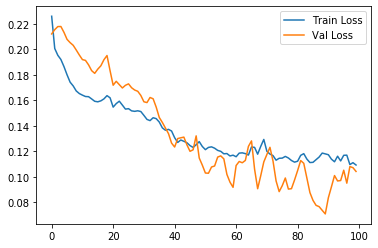

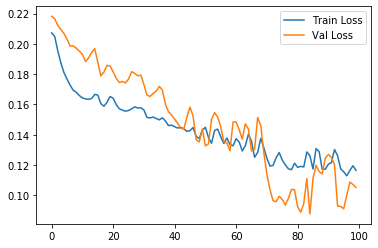

In [69]:
plt.plot(network_1dg3.history['loss'],label='Train Loss')
plt.plot(network_1dg3.history['val_loss'],label='Val Loss')
plt.legend()
plt.show()
plt.plot(network_1dl3.history['loss'],label='Train Loss')
plt.plot(network_1dl3.history['val_loss'],label='Val Loss')
plt.legend()
plt.show()

## Week 5

In [70]:
model_1dg4 = dgru(2)
network_1dg4=model_1dg4.fit(trnx4,train_norm_y4,validation_data=(vanx4,val_norm_y4),epochs=100,batch_size=32,verbose=0)
model_1dl4 = dlstm(2)
network_1dl4=model_1dl4.fit(trnx4,train_norm_y4,validation_data=(vanx4,val_norm_y4),epochs=100,batch_size=32,verbose=0)
pred_1dg4=model_1dg4.predict(tenx4)
mae5_1dg=mean_absolute_error(test_norm_y4,pred_1dg4)
print('Conv1D-GRI_Mean_Absolute_Error:',mae5_1dg)
pred_1dl4=model_1dl4.predict(tenx4)
mae5_1dl=mean_absolute_error(test_norm_y4,pred_1dl4)
print('Conv1D-LSTM_Mean_Absolute_Error:',mae5_1dl)

Conv1D-GRI_Mean_Absolute_Error: 0.10356316287446804
Conv1D-LSTM_Mean_Absolute_Error: 0.1532348203284647


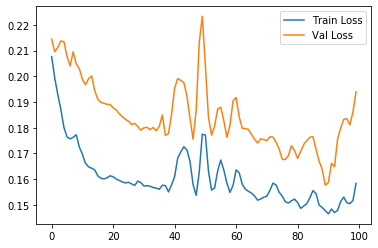

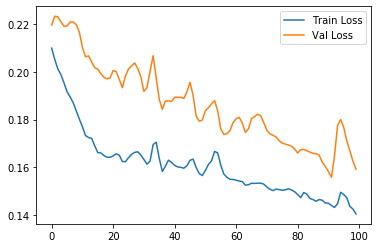

In [71]:
plt.plot(network_1dg4.history['loss'],label='Train Loss')
plt.plot(network_1dg4.history['val_loss'],label='Val Loss')
plt.legend()
plt.show()
plt.plot(network_1dl4.history['loss'],label='Train Loss')
plt.plot(network_1dl4.history['val_loss'],label='Val Loss')
plt.legend()
plt.show()

## Part c

In [95]:
def feature_(data, lookback, foresight):
    X_seq = [data[i:i+lookback] for i in range(len(data)-lookback-foresight)]
    X_seq = [[i[-1] for i in j] for j in X_seq]

    
    X_md = [data[i+lookback-1] for i in range(len(data)-lookback-foresight)]
    X_md = np.array([i[:-1] for i in X_md]).reshape(len(X_md), len(X_md[0])-1)
    
    X = np.column_stack([X_md, X_seq])
    
    Y = [data[i+lookback+foresight] for i in range(len(data)-lookback-foresight)]
    Y = np.array([i[-1] for i in Y])
    
    return X, Y

In [96]:
def get_mae(regressor, X, Y):
    pred = regressor.predict(X)
    mae = metrics.mean_absolute_error(pred, Y)
    return mae

## For Week 0

In [97]:
train_norm_x, train_norm_y = feature_(train_norm, 2, 0)
val_norm_x, val_norm_y = feature_(val_norm, 2, 0)
test_norm_x, test_norm_y = feature_(test_norm, 2, 0)

In [98]:
trnx = np.reshape(train_norm_x,(train_norm_x.shape[0],train_norm_x.shape[1]))
vanx = np.reshape(val_norm_x,(val_norm_x.shape[0],val_norm_x.shape[1]))
tenx = np.reshape(test_norm_x,(test_norm_x.shape[0],test_norm_x.shape[1]))
trnx.shape

(101, 2)

In [99]:

regressor = RandomForestRegressor(n_estimators=30, random_state=0, criterion='mae')
regressor.fit(trnx,train_norm_y)
regressor_val = RandomForestRegressor(n_estimators=30, random_state=0, criterion='mae')
regressor_val.fit(vanx, val_norm_y)
regressor_test = RandomForestRegressor(n_estimators=30, random_state=0, criterion='mae')
regressor_test.fit(tenx, test_norm_y)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [100]:
training_mae1 = get_mae(regressor, trnx, train_norm_y)
val_mae1 = get_mae(regressor, vanx, val_norm_y)
test_mae1 = get_mae(regressor, tenx, test_norm_y)

In [101]:
print("Training mae is : ", training_mae1)
print("Validation mae is : ", val_mae1)
print("Test mae is : ", test_mae1)

Training mae is :  0.03477181051438478
Validation mae is :  0.07957912457912458
Test mae is :  0.026557239057239057


## For Week 2

In [102]:
train_norm_x1, train_norm_y1 = feature_(train_norm, 2, 1)
val_norm_x1, val_norm_y1 = feature_(val_norm, 2, 1)
test_norm_x1, test_norm_y1 = feature_(test_norm, 2, 1)
trnx1 = np.reshape(train_norm_x1,(train_norm_x1.shape[0],train_norm_x1.shape[1]))
vanx1 = np.reshape(val_norm_x1,(val_norm_x1.shape[0],val_norm_x1.shape[1]))
tenx1 = np.reshape(test_norm_x1,(test_norm_x1.shape[0],test_norm_x1.shape[1]))

regressor = RandomForestRegressor(n_estimators=30, random_state=0, criterion='mae')
regressor.fit(trnx1,train_norm_y1)
regressor_val1 = RandomForestRegressor(n_estimators=30, random_state=0, criterion='mae')
regressor_val1.fit(vanx1, val_norm_y1)
regressor_test1 = RandomForestRegressor(n_estimators=30, random_state=0, criterion='mae')
regressor_test1.fit(tenx1, test_norm_y1)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [103]:
training_mae2 = get_mae(regressor, trnx1, train_norm_y1)
val_mae2 = get_mae(regressor, vanx1, val_norm_y1)
test_mae2 = get_mae(regressor, tenx1, test_norm_y1)

In [104]:
print("Training mae is : ", training_mae2)
print("Validation mae is : ", val_mae2)
print("Test mae is : ", test_mae2)

Training mae is :  0.04866245791245791
Validation mae is :  0.11412812333864969
Test mae is :  0.05213981924508242


## For Week 3

In [105]:
train_norm_x2, train_norm_y2 = feature_(train_norm, 2, 2)
val_norm_x2, val_norm_y2 = feature_(val_norm, 2, 2)
test_norm_x2, test_norm_y2 = feature_(test_norm, 2, 2)
trnx2 = np.reshape(train_norm_x2,(train_norm_x2.shape[0],train_norm_x2.shape[1]))
vanx2 = np.reshape(val_norm_x2,(val_norm_x2.shape[0],val_norm_x2.shape[1]))
tenx2 = np.reshape(test_norm_x2,(test_norm_x2.shape[0],test_norm_x2.shape[1]))

regressor = RandomForestRegressor(n_estimators=30, random_state=0, criterion='mae')
regressor.fit(trnx2,train_norm_y2)
regressor_val2 = RandomForestRegressor(n_estimators=30, random_state=0, criterion='mae')
regressor_val2.fit(vanx2, val_norm_y2)
regressor_test2 = RandomForestRegressor(n_estimators=30, random_state=0, criterion='mae')
regressor_test2.fit(tenx2, test_norm_y2)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [106]:
training_mae3 = get_mae(regressor, trnx2, train_norm_y2)
val_mae3 = get_mae(regressor, vanx2, val_norm_y2)
test_mae3 = get_mae(regressor, tenx2, test_norm_y2)
print("Training mae is : ", training_mae3)
print("Validation mae is : ", val_mae3)
print("Test mae is : ", test_mae3)

Training mae is :  0.05770584634220998
Validation mae is :  0.13513842124953235
Test mae is :  0.0815329218106996


## Week 4

In [107]:
train_norm_x3, train_norm_y3 = feature_(train_norm, 2, 3)
val_norm_x3, val_norm_y3 = feature_(val_norm, 2, 3)
test_norm_x3, test_norm_y3 = feature_(test_norm, 2, 3)
trnx3 = np.reshape(train_norm_x3,(train_norm_x3.shape[0],train_norm_x3.shape[1]))
vanx3 = np.reshape(val_norm_x3,(val_norm_x3.shape[0],val_norm_x3.shape[1]))
tenx3 = np.reshape(test_norm_x3,(test_norm_x3.shape[0],test_norm_x3.shape[1]))

regressor = RandomForestRegressor(n_estimators=30, random_state=0, criterion='mae')
regressor.fit(trnx3,train_norm_y3)
regressor_val3 = RandomForestRegressor(n_estimators=30, random_state=0, criterion='mae')
regressor_val3.fit(vanx3, val_norm_y3)
regressor_test3 = RandomForestRegressor(n_estimators=30, random_state=0, criterion='mae')
regressor_test3.fit(tenx3, test_norm_y3)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [108]:
training_mae4 = get_mae(regressor, trnx3, train_norm_y3)
val_mae4 = get_mae(regressor, vanx3, val_norm_y3)
test_mae4 = get_mae(regressor, tenx3, test_norm_y3)
print("Training mae is : ", training_mae4)
print("Validation mae is : ", val_mae4)
print("Test mae is : ", test_mae4)

Training mae is :  0.054660551089122544
Validation mae is :  0.14991087344028522
Test mae is :  0.10603584868290752


## Week 5

In [109]:
train_norm_x4, train_norm_y4 = feature_(train_norm, 2, 4)
val_norm_x4, val_norm_y4 = feature_(val_norm, 2, 4)
test_norm_x4, test_norm_y4 = feature_(test_norm, 2, 4)
trnx4 = np.reshape(train_norm_x4,(train_norm_x4.shape[0],train_norm_x4.shape[1]))
vanx4 = np.reshape(val_norm_x4,(val_norm_x4.shape[0],val_norm_x4.shape[1]))
tenx4 = np.reshape(test_norm_x4,(test_norm_x4.shape[0],test_norm_x4.shape[1]))

regressor = RandomForestRegressor(n_estimators=30, random_state=0, criterion='mae')
regressor.fit(trnx4,train_norm_y4)
regressor_val4 = RandomForestRegressor(n_estimators=30, random_state=0, criterion='mae')
regressor_val4.fit(vanx4, val_norm_y4)
regressor_test4 = RandomForestRegressor(n_estimators=30, random_state=0, criterion='mae')
regressor_test4.fit(tenx4, test_norm_y4)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [110]:
training_mae5 = get_mae(regressor, trnx4, train_norm_y4)
val_mae5 = get_mae(regressor, vanx4, val_norm_y4)
test_mae5 = get_mae(regressor, tenx4, test_norm_y4)
print("Training mae is : ", training_mae5)
print("Validation mae is : ", val_mae5)
print("Test mae is : ", test_mae5)

Training mae is :  0.056617723628032905
Validation mae is :  0.14584385521885523
Test mae is :  0.14387626262626263


<b><i>NOTE: Since Random forest is non-paramaetric, I guess we cant make loss curve for it.

## Part d

In [111]:
col1 = [mae1_g,mae2_g,mae3_g,mae4_g,mae5_g]
col2 = [mae1_l,mae2_l,mae3_l,mae4_l,mae5_l]
col3 = [mae1_1dg,mae2_1dg,mae3_1dg,mae4_1dg,mae5_1dg]
col4 = [mae1_1dl,mae2_1dl,mae3_1dl,mae4_1dl,mae5_1dl]

In [112]:
df = pd.DataFrame(list(zip(col1,col2,col3,col4)),columns = ['GRU','LSTM','1D-GRU','1D-LSTM'],index = ['Week1','Week2','Week3','Week4','Week5'])
df

,GRU,LSTM,1D-GRU,1D-LSTM
Week1,0.027737,0.034753,0.028487,0.027603
Week2,0.050825,0.057941,0.059547,0.058681
Week3,0.091499,0.116866,0.077541,0.093069
Week4,0.131775,0.140801,0.125659,0.128288
Week5,0.153910,0.148346,0.103563,0.153235


### By Using Random Forest

In [113]:
col1 = [training_mae1,training_mae2,training_mae3,training_mae4,training_mae5]
col2 = [val_mae1,val_mae2,val_mae3,val_mae4,val_mae5]
col3 = [test_mae1,test_mae2,test_mae3,test_mae4,test_mae5]
df = pd.DataFrame(list(zip(col1,col2,col3)),columns = ['Training Error','Validation Error','Test Error'],index = ['Week1','Week2','Week3','Week4','Week5'])
df

,Training Error,Validation Error,Test Error
Week1,0.034772,0.079579,0.026557
Week2,0.048662,0.114128,0.052140
Week3,0.057706,0.135138,0.081533
Week4,0.054661,0.149911,0.106036
Week5,0.056618,0.145844,0.143876


As we can see that out of GRU, LSTM, 1D Stacked with GRU and LSTM, 1-D LSTM performs the best as mae value is low.
If we use random forest then the validation and test error is high which is not good for predicting the model. Hence, we can use 1D-LSTM to predict for this data.